In [41]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels 
import scipy
import matplotlib.pyplot as plt 
import seaborn as sns 
import utils 

In [42]:
data = pd.read_csv('data/final.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,bmi,charges,smoker_no,smoker_yes,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Sénior,bmi_log,charges_log,charges_log2,bmi_log2,smoking_status
0,0,0,0,27.90,16884.9240,0,1,0,1,0,3.328627,9.734176,2.275643,1.202560,1
1,1,1,1,33.77,1725.5523,1,0,0,1,0,3.519573,7.453302,2.008657,1.258340,0
2,2,2,2,33.00,4449.4620,1,0,0,1,0,3.496508,8.400538,2.128296,1.251765,0
3,3,3,3,28.88,3866.8552,1,0,0,1,0,3.363149,8.260197,2.111448,1.212878,0
4,4,4,4,25.74,3756.6216,1,0,0,1,0,3.248046,8.231275,2.107941,1.178054,0


In [43]:
#charges_log = f(bmi, smoker_yes ...)
model = sm.formula.ols(formula='charges_log ~ bmi+smoker_yes+categorie_age_Jeune+categorie_age_Adulte -1',
                       data=data)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            charges_log   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              8912.
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:30:02   Log-Likelihood:                         -2429.5
No. Observations:                1256   AIC:                                      4867.
Df Residuals:                    1252   BIC:                                      4888.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bmi                      0.2618      0.003     98.606      0.000       0.257       0.267
smoker_yes               1.9284      0.114     16.855      0.000       1.704       2.153
categorie_age_Jeune      0.1852      0.108      1.707      0.088      -0.028       0.398
categorie_age_Adulte     0.7901      0.116      6.786      0.000       0.562       1.019
==============================================================================
Omnibus:                       19.733   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.444
Skew:                          -0.288   Prob(JB):                     3.64e-05
Kurtosis:                       3.244   Cond. No.                         91.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
###autocorr
resid = fit.resid
utils._ljbox(resid, lags=12)

Ljung-Box Test Statistic: 14.434472537269638, p-value: 0.27382798328538444
No significant autocorrelation detected in the residuals (do not reject null hypothesis).


In [45]:
utils._durbin(resid)

Durbin-Watson Statistic: 2.015684459441746
There’s no significant autocorrelation in your residuals.


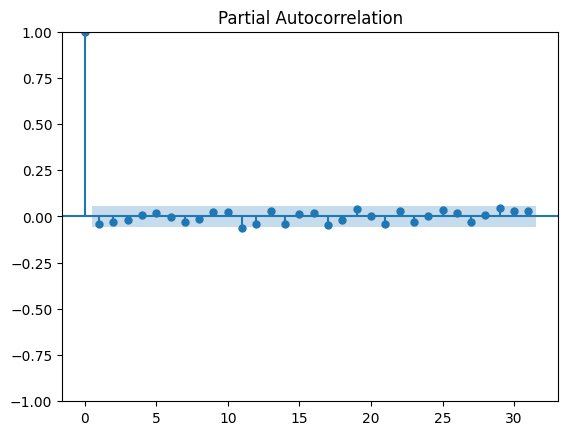

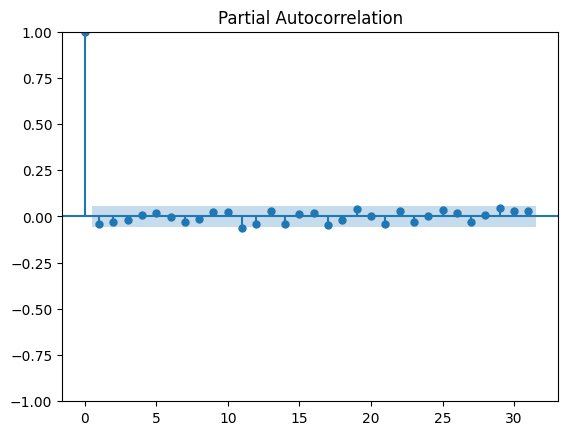

In [54]:
statsmodels.graphics.tsaplots.plot_pacf(resid)

<Axes: >

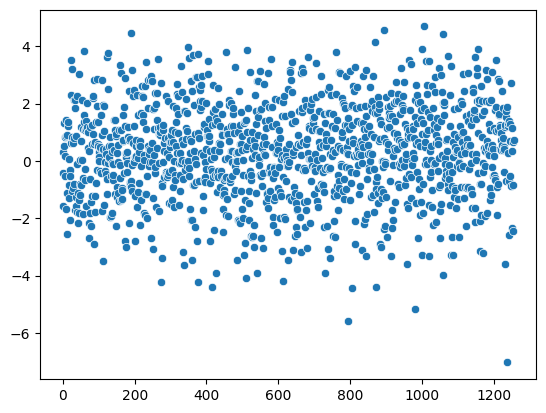

In [53]:
sns.scatterplot(resid)

In [47]:
#hetero 
exog = data[['bmi','smoker_yes','categorie_age_Jeune','categorie_age_Adulte']]
y_pred = fit.predict(exog)
utils._white(resid,y_pred)

White Test Statistic (LM): 650.6896672432771, p-value: 5.064470460737767e-142
White Test Statistic (F): 673.467896494264, p-value: 2.467531522956686e-199


'Decision: Reject the null hypothesis. Evidence of heteroskedasticity.'

In [48]:
utils._white(resid, y_pred)

White Test Statistic (LM): 650.6896672432771, p-value: 5.064470460737767e-142
White Test Statistic (F): 673.467896494264, p-value: 2.467531522956686e-199


'Decision: Reject the null hypothesis. Evidence of heteroskedasticity.'

In [49]:
#normality
utils._kolmogorov_sm(resid)

Kolmogorov-Smirnov Statistic: 0.02765510661487064, p-value: 0.2866670671982823
Residuals are approximately normally distributed (do not reject null hypothesis).


In [50]:
utils._jarqueb(resid)

Jarque-Bera Statistic: 20.44422902975033, p-value: 3.63573375921149e-05
Residuals are not normally distributed (reject null hypothesis).


<Axes: ylabel='Count'>

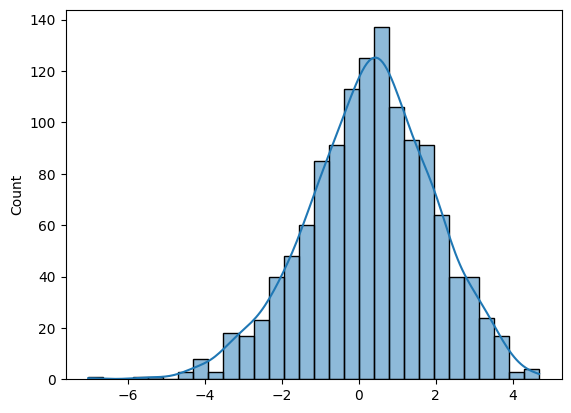

In [56]:
sns.histplot(resid,kde=True)

In [52]:
#multicol 
utils.detect_multicollinearity(exog)

'No significant multicollinearity detected. Condition number: 3.36. (Threshold: 30)'